In [63]:
import pandas as pd
import pylab as pl
from textblob import TextBlob
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [64]:
peliculas = pd.read_csv("peliculas_proyec_final.csv",sep=',')
peliculas

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [65]:
def sentimiento(valor):
    if valor > 0:
        senti = 'POSITIVE'
        #return senti
    if valor < 0:
        senti = 'NEGATIVE' 
        #return senti
    if valor == 0:
        senti = 'POSITIVE' 
    return senti  

In [61]:
#Libreria Textblob

In [66]:
#Se crea una nueva columna para generar el porcentaje del sentimiento de los comentarios de algunas películas con la librería TextBlob
peliculas['sent_textblob'] = peliculas['text'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
peliculas.head()

,text,label,sent_textblob
0,I grew up (b. 1965) watching and loving the Th...,0,0.123287
1,"When I put this movie in my DVD player, and sa...",0,0.131345
2,Why do people who do not know what a particula...,0,-0.041369
3,Even though I have great interest in Biblical ...,0,-0.135714
4,Im a die hard Dads Army fan and nothing will e...,1,0.123256


In [67]:
#Se crea una nueva columna para colocar la descripción de que si el porcentaje es mayor o igual a cero es positivo y si
# el porcentaje es menor a cero es negativo
peliculas['descrip_sent_textblob'] = peliculas['sent_textblob'].apply(lambda valor: sentimiento(valor))
peliculas

,text,label,sent_textblob,descrip_sent_textblob
0,I grew up (b. 1965) watching and loving the Th...,0,0.123287,POSITIVE
1,"When I put this movie in my DVD player, and sa...",0,0.131345,POSITIVE
2,Why do people who do not know what a particula...,0,-0.041369,NEGATIVE
3,Even though I have great interest in Biblical ...,0,-0.135714,NEGATIVE
4,Im a die hard Dads Army fan and nothing will e...,1,0.123256,POSITIVE
...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,0.112128,POSITIVE
39996,This movie is an incredible piece of work. It ...,1,0.230556,POSITIVE
39997,My wife and I watched this movie because we pl...,0,0.041071,POSITIVE
39998,"When I first watched Flatliners, I was amazed....",1,0.333951,POSITIVE


In [68]:
#Se ordena los datos por el porcentaje de mayor a menor
peliculas[['text', 'sent_textblob']].sort_values('sent_textblob',ascending=False)

,text,sent_textblob
26014,This movie had me smiling from beginning to en...,1.000000
9152,Smallville episode Justice is the best episode...,1.000000
34104,This was one of my favorites as a child. My fa...,1.000000
23124,John has made two One man shows. Spic O Rama a...,1.000000
14436,Smallville episode Justice is the best episode...,1.000000
...,...,...
20540,This is without question the worst screen adap...,-0.687500
35572,This film has the worst editing I've ever seen...,-0.695312
410,"Horrible Horrible movie, i still can't believe...",-0.728571
47,The worst movie I have seen in a while. Yeah i...,-0.740000


In [69]:
#Se ordena los datos por el porcentaje de menor a mayor
peliculas[['text', 'sent_textblob']].sort_values('sent_textblob',ascending=True)

,text,sent_textblob
14010,The worst movie i've seen in years (and i've s...,-0.800000
47,The worst movie I have seen in a while. Yeah i...,-0.740000
410,"Horrible Horrible movie, i still can't believe...",-0.728571
35572,This film has the worst editing I've ever seen...,-0.695312
20540,This is without question the worst screen adap...,-0.687500
...,...,...
26014,This movie had me smiling from beginning to en...,1.000000
34104,This was one of my favorites as a child. My fa...,1.000000
9152,Smallville episode Justice is the best episode...,1.000000
27564,Sjöströms masterpiece and a movie that capture...,1.000000


In [70]:
#Se coloca la cantidad y el porcentaje de películas por opiniones negativas y positivas
cant_sent_humano = pd.DataFrame(peliculas.descrip_sent_textblob.value_counts()).reset_index()
cant_sent_humano.columns = ['descrip_textblob', 'cant']
cant_sent_humano1 = pd.DataFrame(round((peliculas.descrip_sent_textblob.value_counts(normalize=True)),2)).reset_index()
cant_sent_humano1.columns = ['descrip_textblob', 'porcentaje']
cant_sent_humano2 = pd.merge(cant_sent_humano, cant_sent_humano1, on='descrip_textblob')
cant_sent_humano2 = cant_sent_humano2.sort_values('cant')
cant_sent_humano2

,descrip_textblob,cant,porcentaje
1,NEGATIVE,9638,0.24
0,POSITIVE,30362,0.76


In [71]:
#Se grafica la cantidad de películas por opiniones negativas y positivas que se generaron con la librería textblob
datos_grafi = go.Bar(x=cant_sent_humano2.descrip_textblob.values[:10],
                     y=cant_sent_humano2.cant.values[:10])

grafica = go.Layout(title='Opiniones Positivas y Negativas con Textblob')

figura = go.Figure(data=[datos_grafi], layout=grafica)
iplot(figura)

In [ ]:
#Libreria Vader 

In [72]:
#Se crea una nueva columna para generar el porcentaje del sentimiento de los comentarios de algunas películas con la librería Vader
peliculas['sent_vader'] = peliculas['text'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
peliculas.head()

,text,label,sent_textblob,descrip_sent_textblob,sent_vader
0,I grew up (b. 1965) watching and loving the Th...,0,0.123287,POSITIVE,0.6510
1,"When I put this movie in my DVD player, and sa...",0,0.131345,POSITIVE,0.9665
2,Why do people who do not know what a particula...,0,-0.041369,NEGATIVE,-0.9568
3,Even though I have great interest in Biblical ...,0,-0.135714,NEGATIVE,-0.7515
4,Im a die hard Dads Army fan and nothing will e...,1,0.123256,POSITIVE,0.7469


In [73]:
#Se crea una nueva columna para colocar la descripción de que si el porcentaje es mayor o igual a cero es positivo y si
# el porcentaje es menor a cero es negativo para la librería vader
peliculas['descrip_sent_vader'] = peliculas['sent_vader'].apply(lambda valor: sentimiento(valor))
peliculas

,text,label,sent_textblob,descrip_sent_textblob,sent_vader,descrip_sent_vader
0,I grew up (b. 1965) watching and loving the Th...,0,0.123287,POSITIVE,0.6510,POSITIVE
1,"When I put this movie in my DVD player, and sa...",0,0.131345,POSITIVE,0.9665,POSITIVE
2,Why do people who do not know what a particula...,0,-0.041369,NEGATIVE,-0.9568,NEGATIVE
3,Even though I have great interest in Biblical ...,0,-0.135714,NEGATIVE,-0.7515,NEGATIVE
4,Im a die hard Dads Army fan and nothing will e...,1,0.123256,POSITIVE,0.7469,POSITIVE
...,...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,0.112128,POSITIVE,0.9967,POSITIVE
39996,This movie is an incredible piece of work. It ...,1,0.230556,POSITIVE,-0.2500,NEGATIVE
39997,My wife and I watched this movie because we pl...,0,0.041071,POSITIVE,0.8641,POSITIVE
39998,"When I first watched Flatliners, I was amazed....",1,0.333951,POSITIVE,0.9800,POSITIVE


In [74]:
#Se ordena los datos por el porcentaje de mayor a menor
peliculas[['text', 'sent_vader']].sort_values('sent_vader',ascending=False)

,text,sent_vader
20020,By now you've probably heard a bit about the n...,0.9999
6368,Jim Carrey is back to much the same role that ...,0.9998
11768,Romance is in the air and love is in bloom in ...,0.9998
19410,It all started with True Heart Bear & Noble He...,0.9998
5339,The quintessential Georgian film of Georgi Dan...,0.9998
...,...,...
34587,Prison is set in Wyoming where work on a new p...,-0.9995
2849,This movie was so bad I don't know where to be...,-0.9995
18626,I'm going to write about this movie and about ...,-0.9996
431,"""Nobi"" or ""Fires On the Plain"" is a film that ...",-0.9996


In [75]:
#Se ordena los datos por el porcentaje de menor a mayor
peliculas[['text', 'sent_vader']].sort_values('sent_vader',ascending=True)

,text,sent_vader
26577,The Bone Collector is set in New York City & s...,-0.9997
18626,I'm going to write about this movie and about ...,-0.9996
431,"""Nobi"" or ""Fires On the Plain"" is a film that ...",-0.9996
35539,"**SPOILERS**Actually based on the novel ""The B...",-0.9995
2849,This movie was so bad I don't know where to be...,-0.9995
...,...,...
5339,The quintessential Georgian film of Georgi Dan...,0.9998
383,"My Comments for VIVAH :- Its a charming, ideal...",0.9998
11768,Romance is in the air and love is in bloom in ...,0.9998
6368,Jim Carrey is back to much the same role that ...,0.9998


In [76]:
#Se coloca la cantidad y el porcentaje de películas por opiniones negativas y positivas
cant_sent_humano3 = pd.DataFrame(peliculas.descrip_sent_vader.value_counts()).reset_index()
cant_sent_humano3.columns = ['descrip_vader', 'cant']
cant_sent_humano4 = pd.DataFrame(round((peliculas.descrip_sent_vader.value_counts(normalize=True)),2)).reset_index()
cant_sent_humano4.columns = ['descrip_vader', 'porcentaje']
cant_sent_humano4 = pd.merge(cant_sent_humano3, cant_sent_humano4, on='descrip_vader')
cant_sent_humano4 = cant_sent_humano4.sort_values('cant')
cant_sent_humano4

,descrip_vader,cant,porcentaje
1,NEGATIVE,13397,0.33
0,POSITIVE,26603,0.67


In [77]:
#Se grafica la cantidad de películas por opiniones negativas y positivas que se generaron con la librería Vader
datos_grafi1 = go.Bar(x=cant_sent_humano4.descrip_vader.values[:10],
                      y=cant_sent_humano4.cant.values[:10])

grafica1 = go.Layout(title='Opiniones Positivas y Negativas VaderSentiment')

figura1 = go.Figure(data=[datos_grafi1], layout=grafica1)
iplot(figura1)

In [ ]:
#Análisis de datos de la etiqueta colocada por la persona

In [78]:
def sent_humano(valor):
    if valor == 0:
        sent_hum = 'NEGATIVE'
    if valor == 1:
        sent_hum = 'POSITIVE' 
    return sent_hum  

In [79]:
#Se crea una nueva columna para colocar la descripción de que si la etiqueta es igual a 1 es positivo y si la etiqueta es igual
#a cero es negativo
peliculas['descri_sent_huma'] = peliculas['label'].apply(lambda valor: sent_humano(valor))
peliculas

,text,label,sent_textblob,descrip_sent_textblob,sent_vader,descrip_sent_vader,descri_sent_huma
0,I grew up (b. 1965) watching and loving the Th...,0,0.123287,POSITIVE,0.6510,POSITIVE,NEGATIVE
1,"When I put this movie in my DVD player, and sa...",0,0.131345,POSITIVE,0.9665,POSITIVE,NEGATIVE
2,Why do people who do not know what a particula...,0,-0.041369,NEGATIVE,-0.9568,NEGATIVE,NEGATIVE
3,Even though I have great interest in Biblical ...,0,-0.135714,NEGATIVE,-0.7515,NEGATIVE,NEGATIVE
4,Im a die hard Dads Army fan and nothing will e...,1,0.123256,POSITIVE,0.7469,POSITIVE,POSITIVE
...,...,...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,0.112128,POSITIVE,0.9967,POSITIVE,POSITIVE
39996,This movie is an incredible piece of work. It ...,1,0.230556,POSITIVE,-0.2500,NEGATIVE,POSITIVE
39997,My wife and I watched this movie because we pl...,0,0.041071,POSITIVE,0.8641,POSITIVE,NEGATIVE
39998,"When I first watched Flatliners, I was amazed....",1,0.333951,POSITIVE,0.9800,POSITIVE,POSITIVE


In [80]:
#Se coloca la cantidad y el porcentaje de películas por opiniones negativas y positivas
cant_sent_humano5 = pd.DataFrame(peliculas.descri_sent_huma.value_counts()).reset_index()
cant_sent_humano5.columns = ['descri_sent_huma', 'cant']
cant_sent_humano6 = pd.DataFrame(round((peliculas.descri_sent_huma.value_counts(normalize=True)),2)).reset_index()
cant_sent_humano6.columns = ['descri_sent_huma', 'porcentaje']
cant_sent_humano6 = pd.merge(cant_sent_humano5, cant_sent_humano6, on='descri_sent_huma')
cant_sent_humano6 = cant_sent_humano6.sort_values('cant')
cant_sent_humano6


,descri_sent_huma,cant,porcentaje
1,POSITIVE,19981,0.5
0,NEGATIVE,20019,0.5


In [81]:
#Se grafica la cantidad de películas por opiniones negativas y positivas que se generaron con la selección del ser humano
datos_grafi_hum = go.Bar(x=cant_sent_humano6.descri_sent_huma.values[:10],
                     y=cant_sent_humano6.cant.values[:10])

grafica_hum = go.Layout(title='Opiniones Positivas y Negativas por valoración humana"')

figura = go.Figure(data=[datos_grafi_hum], layout=grafica_hum)
iplot(figura)

In [ ]:
#Comentario línea 22

In [82]:
peliculas.loc[22]['text']

"I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one."

In [34]:
#No me importa si algunas personas votaron que esta película es mala. Si quieres la verdad, 
#¡esta es una película muy buena! Tiene todo lo que una película debería tener. Realmente deberías conseguir esta".

In [83]:
librerias = ['Textblob',round((peliculas.loc[22]['sent_textblob']),2)]
librerias1 = ['Vader',round((peliculas.loc[22]['sent_vader']),2)]
librerias2 = ['Humano',round((peliculas.loc[22]['label']),2)]

librerias3 = librerias + librerias1 + librerias2
for libreria in librerias3:
    print(libreria)    

Textblob
0.17
Vader
-0.16
Humano
1


In [ ]:
#Se valida el texto de la fila 22 y en este caso la librería Textblob coincide con la selección del ser humando y en mi opinión
#la selección está correcta. En este caso la libreria Vader no es acertada, creeria que solo tomo en cuenta la frase inicial

In [84]:
peliculas.loc[27]['text']

"I saw this film by chance on the small box. It has a fantastic and chilling scene about poisonous gas. A lot about fanatical patriotism. A bit of eroticism. I can't believe it's still waiting for 5 votes!!"

In [ ]:
Vi esta película por casualidad en la caja pequeña. Tiene una escena fantástica y escalofriante sobre el gas venenoso. 
Mucho sobre el patriotismo fanático. Un poco de erotismo. ¡¡No puedo creer que todavía esté esperando 5 votos !!"

In [85]:
librerias = ['Textblob',round((peliculas.loc[27]['sent_textblob']),2)]
librerias1 = ['Vader',round((peliculas.loc[27]['sent_vader']),2)]
librerias2 = ['Humano',round((peliculas.loc[27]['label']),2)]

librerias3 = librerias + librerias1 + librerias2
for libreria in librerias3:
    print(libreria)    

Textblob
-0.21
Vader
0.34
Humano
1


In [ ]:
#Se valida el texto de la fila 27 y en este caso la librería Vader coincide con la selección del ser humando y en mi opinión
#la selección es correcta. En este caso la libreria Textblob es incorrecta, creeria que tuvo en cuenta solo como la frase final.

In [ ]:
#Comentario línea 39996

In [86]:
peliculas.loc[39996]['text']

'This movie is an incredible piece of work. It explores every nook and cranny of the human mind, focusing on the characters relationships with the people around them. Stellar performances all around. This one had me weeping for about half an hour straight. Spend some real time with this one.'

In [ ]:
Esta película es un trabajo increíble. Explora todos los rincones de la mente humana, centrándose en las relaciones de 
los personajes con las personas que los rodean. Actuaciones estelares por todas partes. Este me hizo llorar durante media
hora seguidas. Pasa algo de tiempo real con este., 1

In [87]:
librerias = ['Textblob',round((peliculas.loc[39996]['sent_textblob']),2)]
librerias1 = ['Vader',round((peliculas.loc[39996]['sent_vader']),2)]
librerias2 = ['Humano',round((peliculas.loc[39996]['label']),2)]

librerias3 = librerias + librerias1 + librerias2
for libreria in librerias3:
    print(libreria)


Textblob
0.23
Vader
-0.25
Humano
1


In [ ]:
#Comentario línea 27443

In [88]:
peliculas.loc[27443]['text']

'"One True Thing" puts Zellweger in the midst of a family crisis as an adult journalist who returns home to care for her dying mother (Streep). Somber and plodding, the film studies the adult child coming to terms with the adult view of her parents as they are slowly revealed to be something less than the ideal she grew up knowing as a child. An excellent character study and a find production with little to fault, "OTT" offers three fine performances by a trio of top actors and some plaintive reflections on life and death.'

In [ ]:
Una cosa verdadera coloca a Zellweger en medio de una crisis familiar como una periodista adulta que regresa a casa para cuidar 
a su madre moribunda (Streep). Sombría y laboriosa, la película estudia a la niña adulta llegando a un acuerdo con la visión 
adulta de sus padres a medida que se revelan poco a poco como algo menos que el ideal que ella creció conociendo de niña. 
Un excelente estudio de personajes y una producción de hallazgo con pocas fallas, "OTT" ofrece tres excelentes actuaciones 
de un trío de actores destacados y algunas reflexiones quejumbrosas sobre la vida y la muerte.

In [89]:
librerias = ['Textblob',round((peliculas.loc[27443]['sent_textblob']),2)]
librerias1 = ['Vader',round((peliculas.loc[27443]['sent_vader']),2)]
librerias2 = ['Humano',round((peliculas.loc[27443]['label']),2)]

librerias3 = librerias + librerias1 + librerias2
for libreria in librerias3:
    print(libreria)

Textblob
0.2
Vader
0.3
Humano
1


In [ ]:
#Se valida el texto de la fila 27443 y en este caso todos son positivos y en mi opinipón se encuentra bien.
#Lo que veo en la frase es que no veo ninguna frase con algo negativo, por está razón creería que dieron todas positivas

In [ ]:
#Analizando estas cuatro opiniones lo que veo es que la librería Vader tiene en cuenta como que una sola frase, en cambio la 
#librería Textblob tiene en cuenta varias f rases.

In [162]:
#Métricas de evaluación

In [90]:
def sent_humano(valor):
    if valor == 'NEGATIVE':
        sent_hum = 0
    if valor == 'POSITIVE':
        sent_hum = 1 
    return sent_hum  

In [91]:
#Convierto la columna descrip_sent_textblob en 1 y 0 para poder sacar las métricas
peliculas['label_textblob'] = peliculas['descrip_sent_textblob'].apply(lambda valor: sent_humano(valor))
#peliculas

In [92]:
#Convierto la columna descrip_sent_vader en 1 y 0 para poder sacar las métricas
peliculas['label_vader'] = peliculas['descrip_sent_vader'].apply(lambda valor: sent_humano(valor))
#peliculas

In [93]:
#Exactitud label con Textblob
round((accuracy_score(peliculas['label'], peliculas['label_textblob'])),2)

0.69

In [94]:
#Exactitud label con Vader
round((accuracy_score(peliculas['label'], peliculas['label_vader'])),2)

0.7

In [95]:
#Precision label con Textblob
round((precision_score(peliculas['label'], peliculas['label_textblob'])),2)

0.62

In [96]:
#Precision label con Vader
round((precision_score(peliculas['label'], peliculas['label_vader'])),2)

0.65

In [97]:
#Sensibilidad label con Textblob
round((recall_score(peliculas['label'], peliculas['label_textblob'])),2)

0.95

In [98]:
#Sensibilidad label con Vader
round((recall_score(peliculas['label'], peliculas['label_vader'])),2)

0.86

In [ ]:
#Validando las métricas le está yendo bien con las dos librerías y a la que mejor que le fue es a la sensibilidad con la 
#librería de Textlob

#Esto indica que la libreria Textlob clasifico mejor los comentarios positivos los que si son positivos igualmente pasa
#con los negativos


In [99]:
#Matriz de confusión
matriz_hum_textblob = confusion_matrix(peliculas['label'], peliculas['label_textblob'])
matriz_hum_vader = confusion_matrix(peliculas['label'], peliculas['label_vader'])

In [100]:
def grafica_matrix (cm,titulo):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title(titulo)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

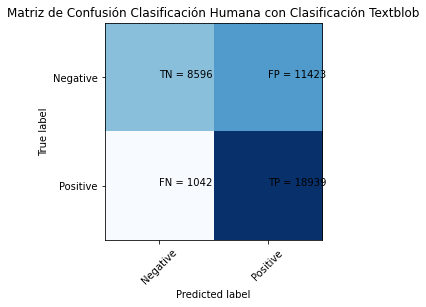

In [56]:
grafica_matrix (matriz_hum_textblob,'Matriz de Confusión Clasificación Humana con Clasificación Textblob')


In [ ]:
#Predice muy bien lo que es positivo, predice más o menos lo que es negativo y para los falsos positivos no le va muy bien y le
#va mejor con los falsos negativos

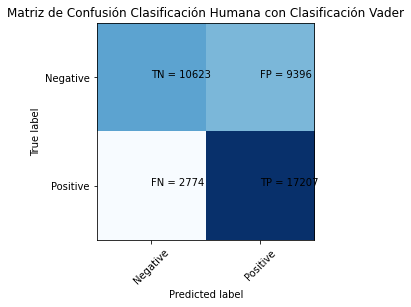

In [101]:
grafica_matrix (matriz_hum_vader,'Matriz de Confusión Clasificación Humana con Clasificación Vader')

In [ ]:
#Predice muy bien lo que es positivo, predice más o menos lo que es negativo y para los falsos positivos no le va muy bien y le
#va mejor con los falsos negativos